## Initial Data Models

### Import required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Import `train_test_split` from `sklearn.model_selection`
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

### Import data

In [3]:
# Create dataframe and reset our header
df = pd.read_csv('Dataset for Models.csv')

# Check dimesions of data 
print('Number of rows:', df.shape[0], '\n'
      'Number of columns:', df.shape[1])

Number of rows: 30000 
Number of columns: 24


In [4]:
# Feature Matrix
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE_BIN', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
y = df.DEFAULT_STATUS

X = df[features]
#y = df[target]
print(X.shape)
print(y.shape)
y.head()

(30000, 23)
(30000,)


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT_STATUS, dtype: int64

### Correlation

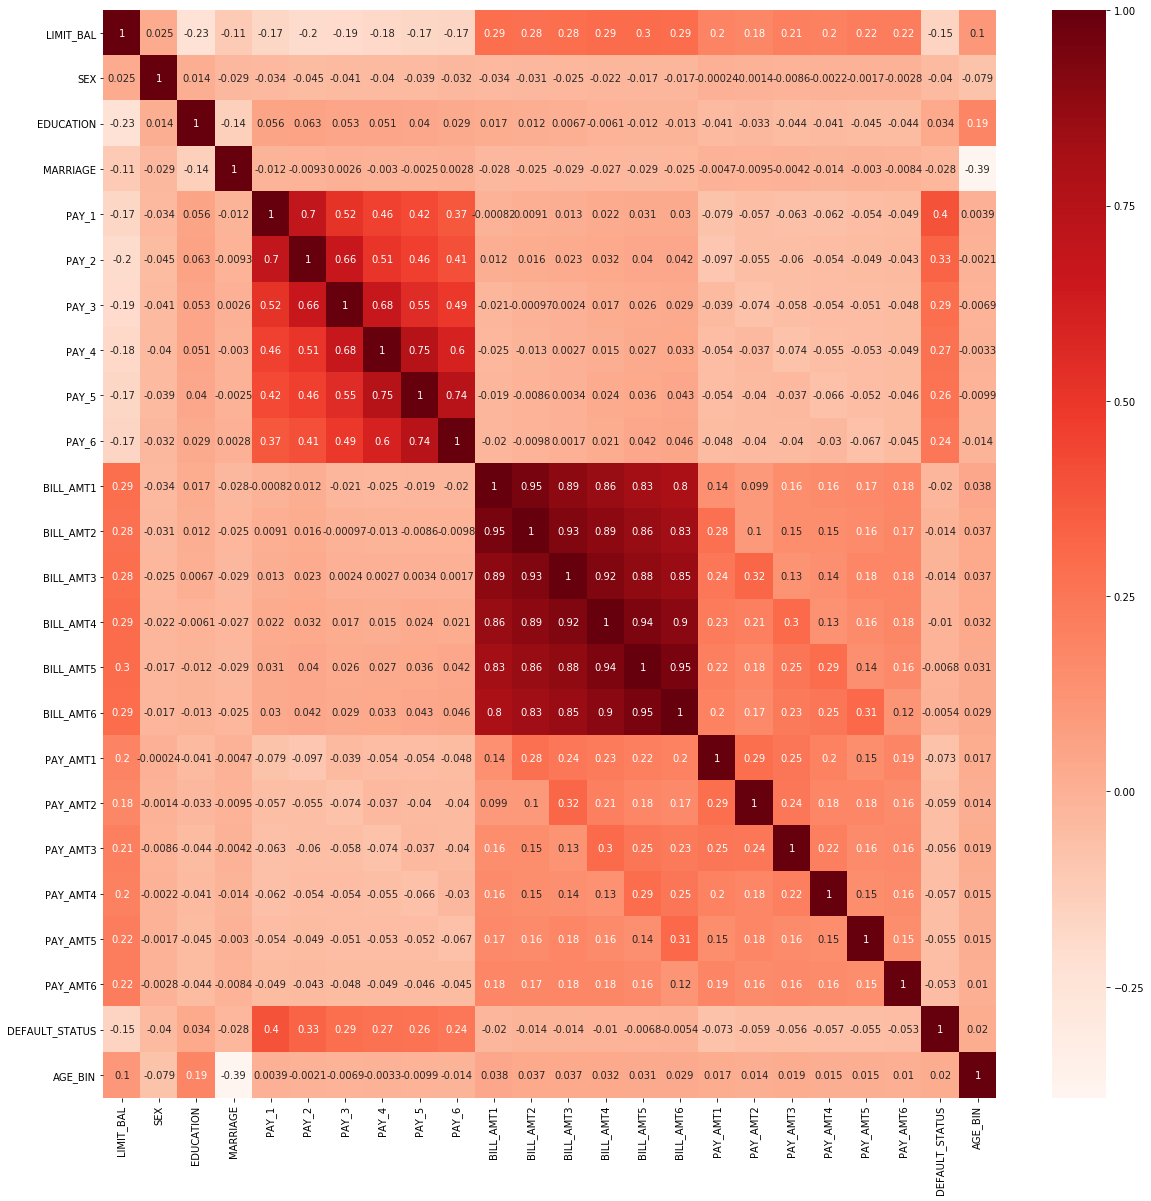

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

Correlation of DEFAULT_STATUS is lowest at -0.15 with LIMIT_BAL. 
This negative correlation indicates that higher the credit limit, lower the chance of deafulting.

Highest is 0.4 correlate with PAY_1.
This positive correlation indicates that longer the period of delayed Payment, higher chances of Default.

All PAY_n variables from PAY_1.....PAY_6 have higher correlation to DEFAULT_STATUS compare to other variables.
Hence, clients payment behaviour strongly indication their chances of Defaulting.


In [6]:
# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2019)

In [7]:
# To handle the target imbalance import SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2019)
X_resample, y_resample = sm.fit_resample(X_train, y_train)

#### Logistic Regression

In [8]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model 
logreg = LogisticRegression(solver='liblinear', random_state=2019)
# fit the model with data
logreg.fit(X_resample,y_resample)
y_pred = logreg.predict(X_test)
print('The accuracy of the Logistic Regression using all variables is:',metrics.accuracy_score(y_test, y_pred).round(2))

The accuracy of the Logistic Regression using all variables is: 0.69


#### DecisionTree Classifier

In [9]:
# import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=10, random_state=2019) 

# training the classifier
classifier.fit(X_resample, y_resample) 

# do our predictions on the test
y_pred = classifier.predict(X_test)
print('The accuracy of the Decision Tree using all variables is:',metrics.accuracy_score(y_test, y_pred).round(3))

The accuracy of the Decision Tree using all variables is: 0.73


#### K-NN Classifier

In [10]:
# import KNeighborsClassifier from sklearn.neighbors 
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 10)
# training the classifier
knn.fit(X_resample,y_resample)
# do our predictions on the test
y_pred = knn.predict(X_test)
print('The accuracy of the KNN using all variables is:',metrics.accuracy_score(y_test, y_pred).round(2))

The accuracy of the KNN using all variables is: 0.63


### Feature Selection Using RFE

In [11]:
# Import ther necessary dependencies
from sklearn.feature_selection import RFE

# Feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
# calculate the score for the selected features
score_stand = rfe.score(X,y)
print("Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False False False  True  True False  True False False]
Feature Ranking: [ 6 15 12 14 17 13 16 18 19 20 21  3  4  8 11  5  9  1  1  2  1  7 10]
Model Score with selected features is: 0.778800 (0.000000)


In [12]:
feature_names = np.array(X.columns)
print('Most important features (RFE): %s'% feature_names[rfe.support_])

Most important features (RFE): ['PAY_AMT1' 'PAY_AMT2' 'PAY_AMT4']


#### Feature Importance

[0.07090806 0.01117001 0.02868131 0.01811137 0.03194288 0.09752369
 0.04440571 0.02574677 0.02198846 0.02025482 0.01985504 0.05834723
 0.05301818 0.05149619 0.05192474 0.05060396 0.05065485 0.0494324
 0.04817126 0.04806962 0.04762097 0.04896626 0.05110621]


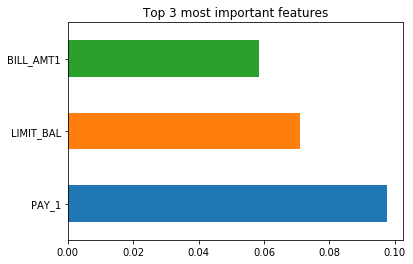

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh')
plt.title('Top 3 most important features')
plt.show()

In [14]:
# Selected Features based on Correlation 
X1 = df[['PAY_1','LIMIT_BAL','BILL_AMT1']]
y1 = df.DEFAULT_STATUS

In [15]:
# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=2019)

In [16]:
# To handle the target imbalance import SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2019)
X_resample, y_resample = sm.fit_resample(X_train, y_train)

#### Logistic Regression

In [17]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear', random_state=2019)

# fit the model with data
logreg.fit(X_resample,y_resample)


y_pred = logreg.predict(X_test)

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cnf_matrix)
print("Accuracy with Logistic Regression:", metrics.accuracy_score(y_test, y_pred).round(2))
print('Classification Report for Logistic Regression Classfier:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[5451  455]
 [1397  197]]
Accuracy with Logistic Regression: 0.75
Classification Report for Logistic Regression Classfier:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      5906
           1       0.30      0.12      0.18      1594

   micro avg       0.75      0.75      0.75      7500
   macro avg       0.55      0.52      0.52      7500
weighted avg       0.69      0.75      0.71      7500



#### KNeighborsClassifier

In [18]:
# import KNeighborsClassifier from sklearn.neighbors 
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 10)
# training the classifier
knn.fit(X_resample,y_resample)

# do our predictions on the test
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

#confusion_matrix_y1 = confusion_matrix(y4_test, y4_pred)
#print('Accuracy of classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
print("Accuracy with kNN:", metrics.accuracy_score(y_test, y_pred).round(2))
print('Confusion Matrix for k-NN Classfier:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report for k-NN Classfier:')
print(classification_report(y_test, y_pred))

Accuracy with kNN: 0.63
Confusion Matrix for k-NN Classfier:
[[4017 1889]
 [ 895  699]]
Classification Report for k-NN Classfier:
              precision    recall  f1-score   support

           0       0.82      0.68      0.74      5906
           1       0.27      0.44      0.33      1594

   micro avg       0.63      0.63      0.63      7500
   macro avg       0.54      0.56      0.54      7500
weighted avg       0.70      0.63      0.66      7500



#### DecisionTreeClassifier

In [19]:
# import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=10, random_state=2019) 

# training the classifier
classifier.fit(X_resample, y_resample)
# do our predictions on the test
y_pred = classifier.predict(X_test)
# see how good we did on the test
print('Accuracy Score:', accuracy_score(y_test, y_pred).round(3))
print('Classification Report for DecisionTree Classfier:')
print(classification_report(y_test, y_pred))

Accuracy Score: 0.713
Classification Report for DecisionTree Classfier:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      5906
           1       0.39      0.60      0.47      1594

   micro avg       0.71      0.71      0.71      7500
   macro avg       0.63      0.67      0.64      7500
weighted avg       0.77      0.71      0.73      7500

